# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [2]:
# Import
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline  

Color code

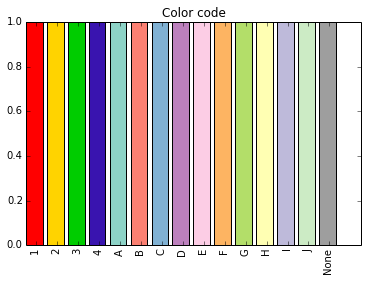

In [3]:
colors = {
    '1' : '#FF0000', '2' : '#FFD300', 
    '3' : '#00CC00', '4' : '#3914AF', 
    'A' : '#8dd3c7', 'B' : '#fb8072', 'C' : '#80b1d3',
    'D' : '#bc80bd', 'E' : '#fccde5', 'F' : '#fdb462',
    'G' : '#b3de69', 'H' : '#ffffb3', 'I' : '#bebada',
    'J' : '#ccebc5', 'None' : '#9e9e9e'}
colors = OrderedDict(sorted(colors.items(), key=lambda t: t[0]))


plt.bar(range(len(colors)), [1]*len(colors), color=colors.values() )
plt.title("Color code")
plt.xticks(np.arange(0.5,len(colors)+.5,1), list(colors.keys()), rotation='vertical')
plt.show()

Load data. The data is a list of edges with topological and dynamical distance.

In [4]:
# Load data
#data = np.genfromtxt('distancias3nodos.csv', delimiter=',', dtype=np.int32)
data = np.genfromtxt('3nodos/epistasis-3-genes-distances.csv', delimiter=',', dtype=np.int32)
#data_filter = [d for d in data if str(d[0])[0] == str(d[1])[0] ]
len(data)

32640

We will add a motif edge index and a color
1. m1-m1 blue
2. m1-m2 'cyan'
3. m1-m3 'DeepPink'
4. m1-m4 'magenta'
5. m2-m2 'green'
6. m2-m3 'Brown'
7. m2-m4 'Olive'
8. m3-m3 'Orange'
9. m3-m4 'OrangeRed'
10. m4-m4 'red'


In [5]:
def edges2index( data ):
    index = [str(d[0]) + str(d[1]) for d in data ]
    index = [d[0]+d[3]+d[1]+d[4]+d[2]+d[5] for d in index ]
    index = [int(d) for d in index]
    return index

def edges2motifcolor( data ):
    color = []
    for d in data:
        i = int(str(d[0])[0] + str(d[1])[0])
        if i == 11: color.append('blue')
        if i == 12: color.append('cyan')
        if i == 13: color.append('deeppink')
        if i == 14: color.append('m')
        if i == 22: color.append('green')
        if i == 23: color.append('brown')
        if i == 24: color.append('olive')
        if i == 33: color.append('orange')
        if i == 34: color.append('orangered')
        if i == 44: color.append('r')
    return color

## Distance distribution

Distribution of topological distances

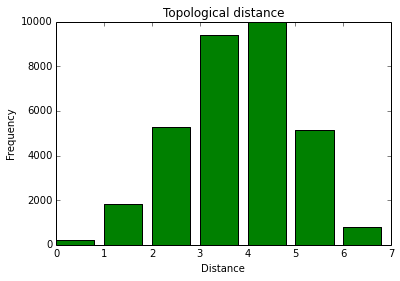

In [6]:
hist_Dtop = list(data[:,2])
hist_Dtop = {i:hist_Dtop.count(i) for i in set(hist_Dtop)}
sorted(hist_Dtop, key=lambda key:hist_Dtop[key])
hist_Dtop

plt.bar(list(hist_Dtop.keys()), list(hist_Dtop.values()), color='g' )
plt.title("Topological distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

Distribution of dynamic distances

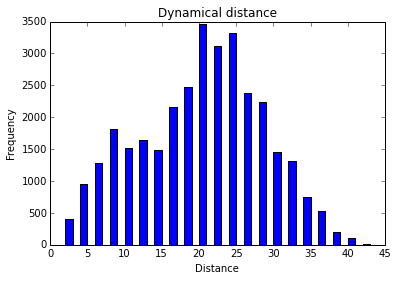

In [7]:
hist_Ddyn = list(data[:,3])
hist_Ddyn = {i:hist_Ddyn.count(i) for i in set(hist_Ddyn)}
sorted(hist_Ddyn, key=lambda key:hist_Ddyn[key])
hist_Ddyn

plt.bar(list(hist_Ddyn.keys()), list(hist_Ddyn.values()), width=1, color='b' )
plt.title("Dynamical distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

* Does it follows a distribution?

Separate by topological distance

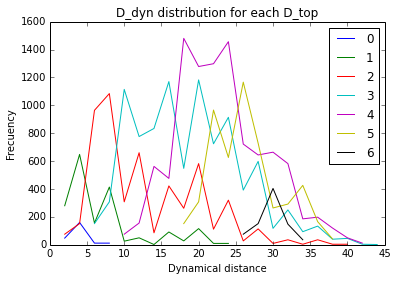

In [8]:
for i in range(0, 7): #sort by topological distance
    Ddist = data[data[:,2]==i]
    Ddist = list(Ddist[:,3])
    Ddist = [[i,Ddist.count(i)] for i in set(Ddist)]
    Ddist = sorted(Ddist,key=lambda x: x[0])
    plt.plot([d[0] for d in Ddist], [d[1] for d in Ddist], label=str(i))

plt.title("D_dyn distribution for each D_top")
plt.xlabel("Dynamical distance")
plt.ylabel("Frecuency")
plt.legend()
plt.show()

Topological vs dynamic distances

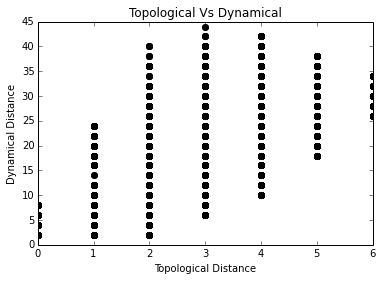

In [9]:
plt.plot(data[:,2], data[:,3], 'ko')
plt.xlabel('Topological Distance')
plt.ylabel('Dynamical Distance')
plt.title('Topological Vs Dynamical')
plt.show()

This is confusing, maybe add a third axis and sort in a better way...

We'll plot by index, intercalating the numbers, so 100-102 -> 110002

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


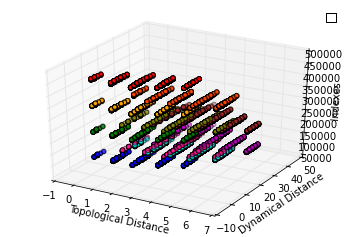

In [10]:
from mpl_toolkits.mplot3d import Axes3D

d_top = data[:,2]
d_dyn = data[:,3]

index = edges2index(data)
color = edges2motifcolor(data)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(d_top, d_dyn, index, c=color)
ax.legend('Distances by index')
ax.set_xlabel('Topological Distance')
ax.set_ylabel('Dynamical Distance')
ax.set_zlabel('Indexes')

plt.show()

Well... Comparisons between same motifs have smaller distances... the rest is a disaster.

Lets filter to obtain only the edges with topological distance 0 and 2

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


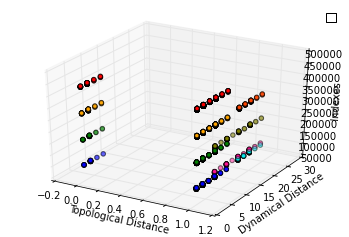

In [11]:
data0 = data[data[:,2]<=1]

index0 = edges2index(data0)
color0 = edges2motifcolor(data0)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data0[:,2], data0[:,3], index0, c=color0)
ax.legend('D_top 0 by index')
ax.set_xlabel('Topological Distance')
ax.set_ylabel('Dynamical Distance')
ax.set_zlabel('Indexes')

plt.show()

Lets plot d_top vs d_dyn only for the comparisons among same motifs.

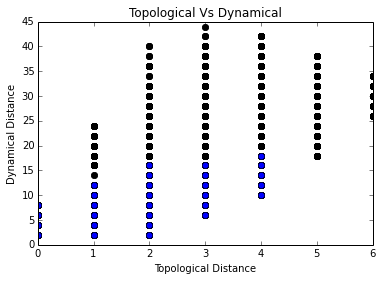

In [12]:
motif = '11'
d_top_m = [   d_t for n1, n2, d_t, d_d in data if (str(n1)[0]+str(n2)[0] == motif)   ]
d_dyn_m = [   d_d for n1, n2, d_t, d_d in data if (str(n1)[0]+str(n2)[0] == motif)   ]

plt.plot(d_top, d_dyn, 'ko') #All distances
plt.plot(d_top_m, d_dyn_m, 'bo') #moti distances
plt.xlabel('Topological Distance')
plt.ylabel('Dynamical Distance')
plt.title('Topological Vs Dynamical')
plt.show()

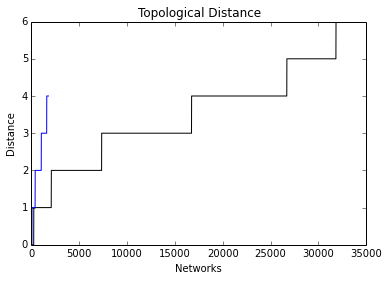

In [13]:
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Topological Distance')
plt.plot(sorted(d_top), 'k') #All distances
plt.plot(sorted(d_top_m), 'b') #motifs distances
plt.show()

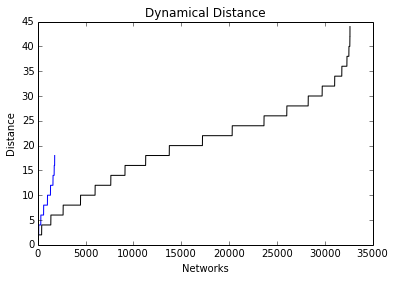

In [14]:
plt.xlabel('Networks')
plt.ylabel('Distance')
plt.title('Dynamical Distance')
plt.plot(sorted(d_dyn), 'k') #All distances
plt.plot(sorted(d_dyn_m), 'b') #motifs distances
plt.show()

## Network

First,lets create a network

Nodes are networks:
* name
* motif
* func _(loop functionality)_
* f_color

Edges:
* w_top
* w_dyn
* index _(mixed index of nodes)_
* m_color _(color of motifs)_

In [15]:
import networkx as nx

G = nx.Graph()

#first, create nodes with funcionality
f = open('3nodos/Loops_Functionality.csv','r')
#f.readline() #remove header
for line in f:
    line = line.strip().split(',')
    if line[1] == '': #no func
        G.add_node(int(line[0]), motif=int(line[0][0]),
                  #func=line[1], f_color=colors[ line[0][0] ])
                  func=line[1], f_color=colors[ 'None' ])
    elif line[1][-1] == 'A': #func A
        G.add_node(int(line[0]), motif=int(line[0][0]),
                  func=line[1], f_color=colors['A'])
    elif line[1][-1] == 'B': #func B
        G.add_node(int(line[0]), motif=int(line[0][0]),
                  func=line[1], f_color=colors['B'])
f.close()
G.nodes(data=True)

#lets add edges, no threshold (yet)
for d in zip(data.tolist(), edges2index(data), edges2motifcolor(data)):
    G.add_edge(d[0][0], d[0][1], 
               w_top=d[0][2], w_dyn=d[0][3],
               index=d[1], m_color=d[2])

G.nodes(data=True)
#G.edges(data=True)

[(100, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (101, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (102, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (103, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (104, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (105, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (106, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (107, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (108, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (109, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (110, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (111, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (112, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (113, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (114, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (115, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (116, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (117, {'f_color': '#9e9e9e', 'func': '', 

First, lets threshold by d_top = 0 and plot. We'll color with motif and label with funloops

In [16]:
G0 = G.copy()
# remove edgens with d_top > 0
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']!=0]
G0.remove_edges_from(del_edges)
# remove unconnected nodes
deg = G0.degree()
del_nodes = [n for n in deg if deg[n] == 0]
G0.remove_nodes_from(del_nodes)

G0.edges(data=True)
#G0.nodes(data=True)

[(100, 107, {'index': 110007, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (102, 108, {'index': 110028, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (106, 138, {'index': 110368, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 112, {'index': 111112, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (111, 113, {'index': 111113, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 114, {'index': 111114, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 132, {'index': 111312, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 139, {'index': 111319, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (112, 113, {'index': 111123, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (112, 114, {'index': 111124, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (112, 132, {'index': 111322, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (112, 139, {'index': 111329, 'm_color': 'blue', 'w_dyn': 6, 'w_top': 0}),
 (113, 114, {'index': 111134, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (113, 132, {'index': 111

Plot with lightning

First we need a matrix of weights, we will cut using d_top and the weights come from d_dyn.

In [17]:
i = 0 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)
Di_dyn

f_color = [Gi.node[n]['f_color'] for n in Gi.nodes()]
f_color = [ [int(c[1:3], 16), int(c[3:5], 16), int(c[5:], 16)] for c in f_color]
f_color

[[158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [141, 211, 199],
 [141, 211, 199],
 [141, 211, 199],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [141, 211, 199],
 [141, 211, 199],
 [141, 211, 199],
 [158, 158, 158],
 [158, 158, 158],
 [141, 211, 199],
 [158, 158, 158],
 [141, 211, 199],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158, 158],
 [158, 158

yeah, I changed the colors


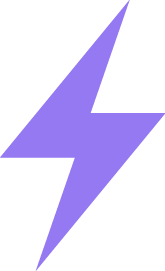

Running local mode, some functionality limited.



In [18]:
from lightning import Lightning
from numpy import random
lgn = Lightning(ipython=True, local=True)

lgn.force(Di_dyn, color=f_color)

Lets cut by d_dyn and color by motif

1. m1 'blue'
2. m2 'cyan'
3. m3 'green'
4. m4 'red'

In [19]:
m_color = [Gi.node[n]['motif'] for n in Gi.nodes()]
m_color = [ colors[str(c)] for c in m_color]
m_color = [ [int(c[1:3], 16), int(c[3:5], 16), int(c[5:], 16)] for c in m_color]

In [20]:
i = 2 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>=i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=f_color)

/usr/local/lib/python3.4/dist-packages/numpy/lib/nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


In [21]:
lgn.force(Di_dyn, color=f_color)

In [22]:
i = 4 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=f_color)

In [23]:
i = 8 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=f_color)

In [24]:
i = 12 #threshold
Gi = G.copy()
# remove edgens with d_top > i
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>i]
Gi.remove_edges_from(del_edges)

Di_dyn = np.array(nx.to_numpy_matrix(Gi, weight='w_dyn', nonedge=None))
np.nanmax(Di_dyn)-Di_dyn #Transform from weight to force.
Di_dyn = np.nan_to_num(Di_dyn)

lgn.force(Di_dyn, color=f_color)

Lets see how thresholding affects the number of components.

First, topological distance

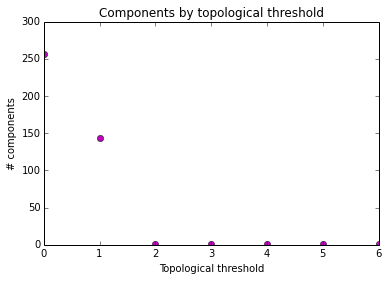

In [25]:
for i in range(0, max(data[:,2]+1)): #sort by topological distance
    Gi = G.copy()
    # remove edgens with d_top > 0
    del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']>=i]
    Gi.remove_edges_from(del_edges)
    n = nx.number_connected_components(Gi)
    plt.plot(i, n, 'mo')

plt.xlabel('Topological threshold')
plt.ylabel('# components')
plt.title('Components by topological threshold')

plt.show()

Lets separate by motif and plot.

1 b
2 c
3 g
4 r


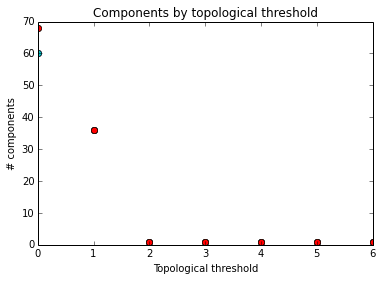

In [26]:
for m, c in [  [1,'b'], [2,'c'], [3,'g'], [4,'r']  ]:
    print(m,c)
    n_motif = [   n for n in G.nodes() if G.node[n]['motif']==m   ]
    Gm = G.subgraph(n_motif)
    
    for i in range(0, max(data[:,2]+1)): #sort by topological distance
        Gi = Gm.copy()
        # remove edgens with d_top > 0
        del_edges = [ (u,v,d) for u,v,d in Gm.edges(data=True) if d['w_top']>=i]
        Gi.remove_edges_from(del_edges)
        n = nx.number_connected_components(Gi)
        plt.plot(i, n, c+'o')

plt.xlabel('Topological threshold')
plt.ylabel('# components')
plt.title('Components by topological threshold')

plt.show()

Lets try dynamical distance

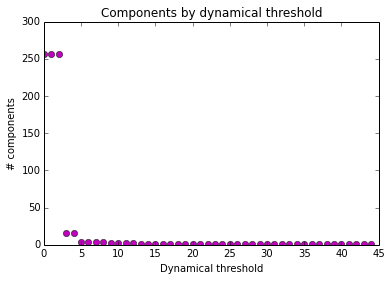

In [27]:
for i in range(0, max(data[:,3]+1)): #sort by topological distance
    Gi = G.copy()
    # remove edgens with d_top > 0
    del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_dyn']>=i]
    Gi.remove_edges_from(del_edges)
    n = nx.number_connected_components(Gi)
    plt.plot(i, n, 'mo')

plt.xlabel('Dynamical threshold')
plt.ylabel('# components')
plt.title('Components by dynamical threshold')

plt.show()

1 b
2 c
3 g
4 r


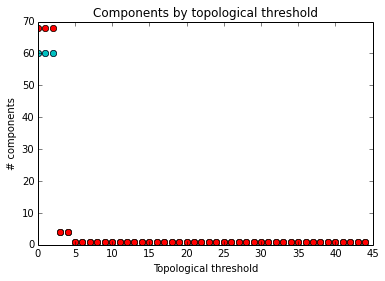

In [28]:
for m, c in [  [1,'b'], [2,'c'], [3,'g'], [4,'r']  ]:
    print(m,c)
    n_motif = [   n for n in G.nodes() if G.node[n]['motif']==m   ]
    Gm = G.subgraph(n_motif)
    
    for i in range(0, max(data[:,3]+1)): #sort by topological distance
        Gi = Gm.copy()
        # remove edgens with d_top > 0
        del_edges = [ (u,v,d) for u,v,d in Gm.edges(data=True) if d['w_dyn']>=i]
        Gi.remove_edges_from(del_edges)
        n = nx.number_connected_components(Gi)
        plt.plot(i, n, c+'o')

plt.xlabel('Topological threshold')
plt.ylabel('# components')
plt.title('Components by topological threshold')

plt.show()

In [29]:
Gf = G.copy()

# remove edges with d_top > 0
del_edges = [ (u,v,d) for u,v,d in Gf.edges(data=True) if d['w_top']!=0]
Gf.remove_edges_from(del_edges)
# remove components with no functionalities
del_nodes = []
for Gi in nx.connected_components(Gf):
    f = ''
    for n in Gi: f += Gf.node[n]['func']
    if f == '': del_nodes += list( Gi )
del_nodes
Gf.remove_nodes_from(del_nodes)

#Gf.edges(data=True)
Gf.nodes(data=True)

[(111, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (112, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (113, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (114, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (126, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (127, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (128, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (129, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (130, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (132, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (134, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (139, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (212, {'f_color': '#9e9e9e', 'func': '', 'motif': 2}),
 (213, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 2}),
 (214, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 2}),
 (215, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 2}),
 (227, {'f_color': '#9e9e9e', 'func': '', 'motif': 2}),
 (228, {'f_color': '#8dd3c

In [30]:
Df_dyn = np.array(nx.to_numpy_matrix(Gf, weight='w_dyn', nonedge=None))
np.nanmax(Df_dyn)-Df_dyn #Transform from weight to force.
Df_dyn = np.nan_to_num(Df_dyn)

f0_color = [Gf.node[n]['f_color'] for n in Gf.nodes()]
f0_color = [ [int(c[1:3], 16), int(c[3:5], 16), int(c[5:], 16)] for c in f0_color]

lgn.force(Df_dyn, color=f0_color)

In [31]:
# remove edges with d_top > 0
del_edges = [ (u,v,d) for u,v,d in G.edges(data=True) if d['w_top']!=0]
G0.remove_edges_from(del_edges)
# remove unconnected nodes
deg = G0.degree()
del_nodes = [n for n in deg if deg[n] == 0]
G0.remove_nodes_from(del_nodes)

G0.edges(data=True)
#G0.nodes(data=True)

[(100, 107, {'index': 110007, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (102, 108, {'index': 110028, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (106, 138, {'index': 110368, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 112, {'index': 111112, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (111, 113, {'index': 111113, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 114, {'index': 111114, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 132, {'index': 111312, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (111, 139, {'index': 111319, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (112, 113, {'index': 111123, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (112, 114, {'index': 111124, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (112, 132, {'index': 111322, 'm_color': 'blue', 'w_dyn': 2, 'w_top': 0}),
 (112, 139, {'index': 111329, 'm_color': 'blue', 'w_dyn': 6, 'w_top': 0}),
 (113, 114, {'index': 111134, 'm_color': 'blue', 'w_dyn': 4, 'w_top': 0}),
 (113, 132, {'index': 111

Interesting, the components are in levels, but the distribution is almost continuous

In [32]:
data = []
for e1, e2 in G.edges():
    data.append(G[e1][e2]['w_dyn'])
print( 'G', np.mean(data), np.std(data))

data = []
for e1, e2 in G0.edges():
    data.append(G[e1][e2]['w_dyn'])
print( 'G0', np.mean(data), np.std(data))

data = []
for e1, e2 in Gf.edges():
    data.append(G[e1][e2]['w_dyn'])
print( 'Gf', np.mean(data), np.std(data))

G 19.8107843137 8.34274848752
G0 3.89655172414 1.36064963151
Gf 3.86666666667 1.54344492037


In [33]:
Gf.nodes(data=True)

[(111, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (112, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (113, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (114, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (126, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (127, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (128, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (129, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (130, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (132, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (134, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 1}),
 (139, {'f_color': '#9e9e9e', 'func': '', 'motif': 1}),
 (212, {'f_color': '#9e9e9e', 'func': '', 'motif': 2}),
 (213, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 2}),
 (214, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 2}),
 (215, {'f_color': '#8dd3c7', 'func': 'FA', 'motif': 2}),
 (227, {'f_color': '#9e9e9e', 'func': '', 'motif': 2}),
 (228, {'f_color': '#8dd3c

## Dendogram

Clustering!

First, lets get the matrixes and remove nans. The matrixes are in the order of G.nodes()

In [34]:
D_top = np.array(nx.to_numpy_matrix(G, weight='w_top', nonedge=None))
D_top = np.nan_to_num(D_top)
D_dyn = np.array(nx.to_numpy_matrix(G, weight='w_dyn', nonedge=None))
D_dyn = np.nan_to_num(D_dyn)

Cluster and verify clustering

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(D_dyn,'ward')
Z

#Verify clustering, 1 is ideal
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(D_dyn))
c

0.8823530626014533

Could be worse. D_dyn is .882; D_top is .437, which is unaceptable. 'Ward' gives best results.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


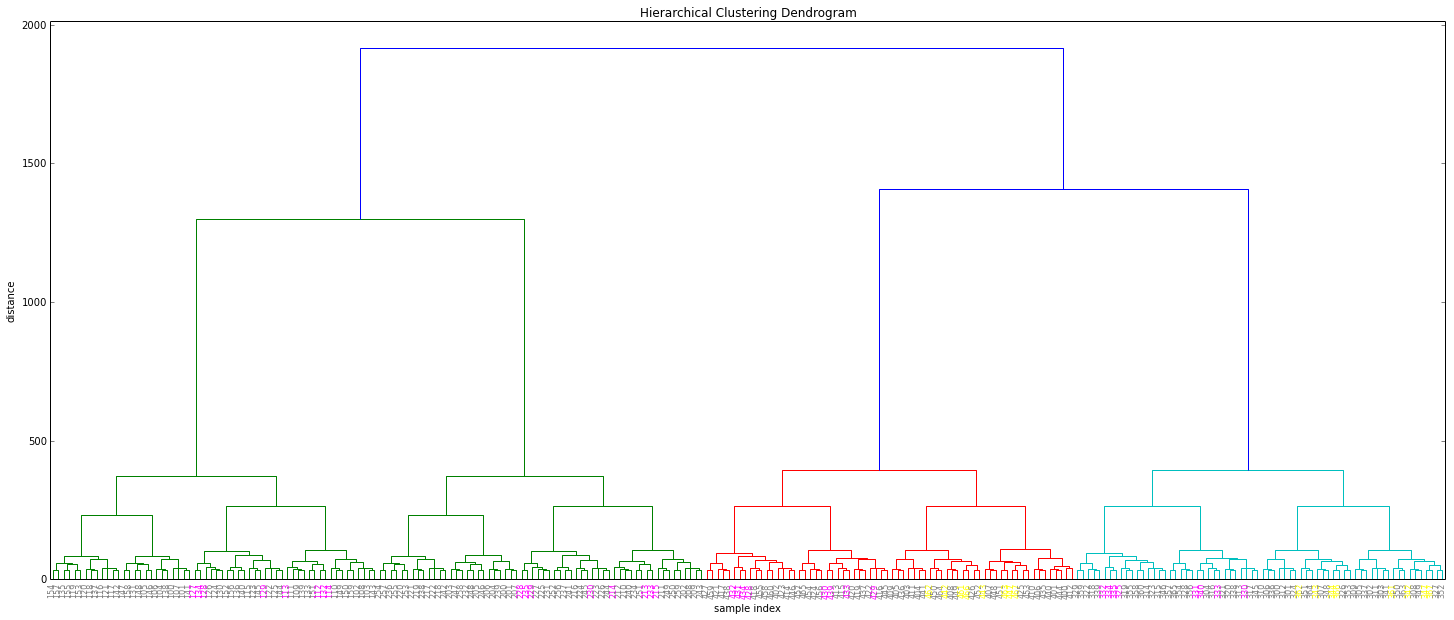

In [36]:
node_labels = list(G.nodes())
#node_labels = [G.node[n]['func']+'-'+str(n) for n in node_labels]

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=node_labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

label_colors = {  '112':'magenta','113':'magenta','114':'magenta','127':'magenta','128':'magenta','129':'magenta','132':'magenta','134':'magenta','213':'magenta','214':'magenta','215':'magenta','228':'magenta','229':'magenta','230':'magenta','233':'magenta','235':'magenta','325':'magenta','330':'magenta','331':'magenta','332':'magenta','333':'magenta','334':'magenta','335':'magenta','340':'magenta','342':'yellow','343':'yellow','344':'yellow','347':'yellow','361':'yellow','362':'yellow','366':'yellow','367':'yellow','428':'magenta','429':'magenta','430':'magenta','431':'magenta','432':'magenta','433':'magenta','434':'magenta','439':'magenta','442':'yellow','443':'yellow','447':'yellow','461':'yellow','462':'yellow','463':'yellow','466':'yellow','467':'yellow'  }

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    #print(lbl.get_text(),)
    if lbl.get_text() in label_colors.keys():
        lbl.set_color(label_colors[lbl.get_text()])
    else: lbl.set_color('grey')
#ax.set_yscale("log", nonposy='clip')

#plt.savefig('1PLN-Dendogram.svg')
plt.show()

It groups by motif, and most (but not all) nets with the same topology are near. I recomend opening the image in new tab for checking.

I can add a heatmap, but I'm not sure it would add anything interesting.

There is not a clear distribution in the functional loops

Note: consider truncating the dendogram, basicaly, do I need to separate in clusters?

Note: try log axis and roll on to see names

## Fun Loops!

Epileptic trees: fun loops only appear in networks that have 6 possible models, and usually only in 4/6 models

It would be worthy to plot all networks with a functionality and compare transition tables